# Quick look at the Bitfinex crypto currency dataset
In this kernel we will have a first look at the **Bitfinex crypto currency dataset**. For details about how this data was collected you can have a look at [this articel](https://medium.com/coinmonks/how-to-get-historical-crypto-currency-data-954062d40d2d). So, to get started lets import some useful packages first.

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Next let's have a look on what currency pairs are in the dataset and how many pairs there are in total.

In [2]:
# Data path
#input_path = "../input/cryptominuteresolution"
input_path = "input/392-crypto-currency-pairs-at-minute-resolution"

# Get names and number of available currency pairs
pair_names = [x[:-4] for x in os.listdir(input_path)]
n_pairs = len(pair_names)

# Print the first 50 currency pair names
print("These are the first 50 out of {} currency pairs in the dataset:".format(n_pairs))
print(pair_names[0:50])

These are the first 50 out of 443 currency pairs in the dataset:
['1inch-usd', '1inch-ust', 'aaabbb', 'aave-usd', 'aave-ust', 'adabtc', 'adaf0-ustf0', 'adausd', 'adaust', 'aixusd', 'aixust', 'albt-usd', 'albt-ust', 'algbtc', 'algusd', 'algust', 'ampbtc', 'ampf0-ustf0', 'ampusd', 'ampust', 'ancusd', 'ancust', 'antbtc', 'anteth', 'antusd', 'astusd', 'atobtc', 'atoeth', 'atousd', 'atoust', 'avax-usd', 'avax-ust', 'avtusd', 'axsusd', 'axsust', 'b21x-usd', 'b21x-ust', 'balusd', 'balust', 'band-usd', 'band-ust', 'batbtc', 'bateth', 'batusd', 'batust', 'bchabc-usd', 'bchn-usd', 'best-usd', 'bftusd', 'bmiusd']


We want to look at several trading pairs later, so let's define a function that loads data by pair names first.

In [3]:
def load_data(symbol, source=input_path):
    path_name = source + "/" + symbol + ".csv"
    
    # Load data
    df = pd.read_csv(path_name, index_col='time')
    
    # Convert timestamp to datetime
    df.index = pd.to_datetime(df.index, unit='ms')
    
    # Remove duplicate indices if present
    df = df[~df.index.duplicated(keep='first')]
    
    # As mentioned in the description, bins without any change are not recorded.
    # We have to fill these gaps by filling them with the last value until a change occurs.
    df = df.resample('1T').pad()
    
    return df

Now let's load some data using our previously defined function. And while we are at it lets also have a quick look at the head of the **BTC/USD** dataset.

In [4]:
btcusd = load_data("btcusd")
ethusd = load_data("ethusd")
ltcusd = load_data("ltcusd")
xrpusd = load_data("xrpusd")

# Take a look at the head of the BTC/USD data
btcusd.head()

/tmp/ipykernel_771868/3533283376.py:15: FutureWarning: pad is deprecated and will be removed in a future version. Use ffill instead.
  df = df.resample('1T').pad()
/tmp/ipykernel_771868/3533283376.py:15: FutureWarning: pad is deprecated and will be removed in a future version. Use ffill instead.
  df = df.resample('1T').pad()
/tmp/ipykernel_771868/3533283376.py:15: FutureWarning: pad is deprecated and will be removed in a future version. Use ffill instead.
  df = df.resample('1T').pad()
/tmp/ipykernel_771868/3533283376.py:15: FutureWarning: pad is deprecated and will be removed in a future version. Use ffill instead.
  df = df.resample('1T').pad()


,open,close,high,low,volume
time,,,,,
2013-04-01 00:07:00,93.25,93.30,93.30,93.25,93.300000
2013-04-01 00:08:00,100.00,100.00,100.00,100.00,93.300000
2013-04-01 00:09:00,93.30,93.30,93.30,93.30,33.676862
2013-04-01 00:10:00,93.30,93.30,93.30,93.30,33.676862
2013-04-01 00:11:00,93.35,93.47,93.47,93.35,20.000000


Alright as we can see the timestamps have been converted to a human readable format and we have the open, close, high, low and volume data present as well. So next we plot the closing price of the BTC/USD and the ETH/USD dataset. First for the entire dataset, to see it in full, and then we will zoom in more and more to check the 1-minute resolution.

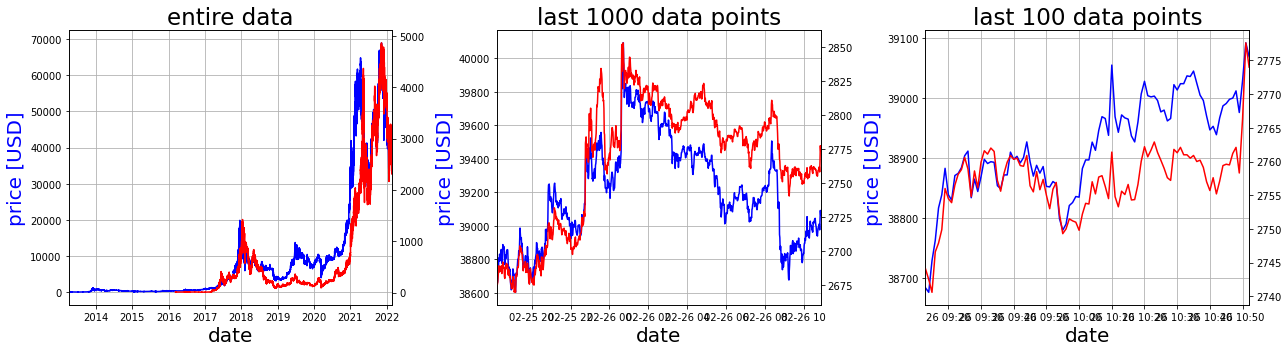

In [5]:
# Set up the sub plots
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Plot the data
ax[0].plot(btcusd['close'], color='blue', label='BTC/USD')
ax[0].set_ylabel('price [USD]', fontsize=20, color='blue')
ax[0].set_xlabel('date', fontsize=20)
ax[0].set_title('entire data', fontsize=23)
ax[0].set_xlim([btcusd.index[0], btcusd.index[-1]])
ax[0].grid()

ax[0].twinx().plot(ethusd['close'], color='red', label='ETH/USD')

ax[1].plot(btcusd['close'].iloc[-1000:], color='blue', label='BTC/USD')
ax[1].set_ylabel('price [USD]', fontsize=20, color='blue')
ax[1].set_xlabel('date', fontsize=20)
ax[1].set_title('last 1000 data points', fontsize=23)
ax[1].set_xlim([btcusd.index[-1000], btcusd.index[-1]])
ax[1].grid()

ax[1].twinx().plot(ethusd['close'].iloc[-1000:], color='red', label='ETH/USD')

ax[2].plot(btcusd['close'].iloc[-100:], color='blue', label='BTC/USD')
ax[2].set_ylabel('price [USD]', fontsize=20, color='blue')
ax[2].set_xlabel('date', fontsize=20)
ax[2].set_title('last 100 data points', fontsize=23)
ax[2].set_xlim([btcusd.index[-100], btcusd.index[-1]])
ax[2].grid()

ax[2].twinx().plot(ethusd['close'].iloc[-100:], color='red', label='ETH/USD')

fig.tight_layout()
plt.show()

As we can see from the above plot it is hard to directly compare the BTC and ETH data. That is why we used two y-axis in this example. However, if we want to compare more crypto charts we need to think of something else. One common way is to calculate the log returns of each currency pair over time. Below we define a function to calculate the log returns.

In [6]:
def log_return(data):
    return np.log(data.shift(0)/data.shift(1))

Next we will plot the log returns for the four datasets we loaded previously. First the raw log returns and in a second plot the moving mean to get a better understanding of how things developed over time.

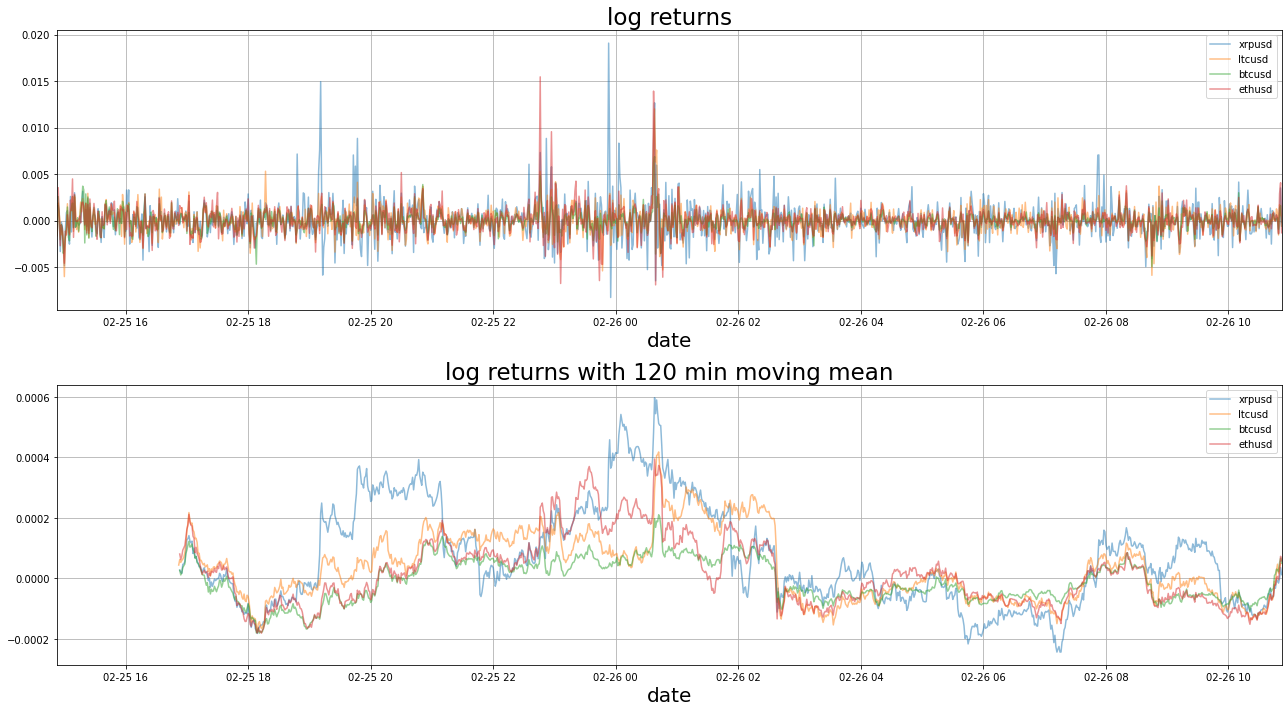

In [7]:
# Define the parameters for the moving mean
n_ticks = 1200
rolling_mean = 120

fig, ax = plt.subplots(2, 1, figsize=(18, 10))

ax[0].plot(log_return(xrpusd['close'].iloc[-n_ticks:]), alpha=0.5, label='xrpusd')
ax[0].plot(log_return(ltcusd['close'].iloc[-n_ticks:]), alpha=0.5, label='ltcusd')
ax[0].plot(log_return(btcusd['close'].iloc[-n_ticks:]), alpha=0.5, label='btcusd')
ax[0].plot(log_return(ethusd['close'].iloc[-n_ticks:]), alpha=0.5, label='ethusd')

ax[0].set_xlim([ethusd.index[-1200], ethusd.index[-1]])
ax[0].set_title('log returns', fontsize=23)
ax[0].set_xlabel('date', fontsize=20)
ax[0].grid()
ax[0].legend()

ax[1].plot(log_return(xrpusd['close'].iloc[-n_ticks:].rolling(rolling_mean).mean()), alpha=0.5, label='xrpusd')
ax[1].plot(log_return(ltcusd['close'].iloc[-n_ticks:].rolling(rolling_mean).mean()), alpha=0.5, label='ltcusd')
ax[1].plot(log_return(btcusd['close'].iloc[-n_ticks:].rolling(rolling_mean).mean()), alpha=0.5, label='btcusd')
ax[1].plot(log_return(ethusd['close'].iloc[-n_ticks:].rolling(rolling_mean).mean()), alpha=0.5, label='ethusd')

ax[1].set_xlim([ethusd.index[-1200], ethusd.index[-1]])
ax[1].set_title('log returns with {} min moving mean'.format(rolling_mean), fontsize=23)
ax[1].set_xlabel('date', fontsize=20)
ax[1].grid()
ax[1].legend()

fig.tight_layout()
plt.show()

So finally let's have a look at correlations between currency pairs. We will load 10 pairs and plot their correlations in a heatmap.

In [8]:
# Load currency pairs and calculate the moving mean
data = pd.DataFrame()
col_names = []
for pair in pair_names[0:10]:
    tmp = load_data(pair)
    data = pd.concat([data, log_return(tmp.close).rolling(rolling_mean).mean()], axis=1)
    col_names.append(pair)
    
data.columns = col_names
data.dropna(how='all', axis=1, inplace=True)

/tmp/ipykernel_771868/3533283376.py:15: FutureWarning: pad is deprecated and will be removed in a future version. Use ffill instead.
  df = df.resample('1T').pad()
/tmp/ipykernel_771868/3533283376.py:15: FutureWarning: pad is deprecated and will be removed in a future version. Use ffill instead.
  df = df.resample('1T').pad()
/tmp/ipykernel_771868/3533283376.py:15: FutureWarning: pad is deprecated and will be removed in a future version. Use ffill instead.
  df = df.resample('1T').pad()
/tmp/ipykernel_771868/3533283376.py:15: FutureWarning: pad is deprecated and will be removed in a future version. Use ffill instead.
  df = df.resample('1T').pad()
/tmp/ipykernel_771868/3533283376.py:15: FutureWarning: pad is deprecated and will be removed in a future version. Use ffill instead.
  df = df.resample('1T').pad()
/tmp/ipykernel_771868/3533283376.py:15: FutureWarning: pad is deprecated and will be removed in a future version. Use ffill instead.
  df = df.resample('1T').pad()
/tmp/ipykernel_7

Now let's calculate the correlations and visualize the results in a heat map.

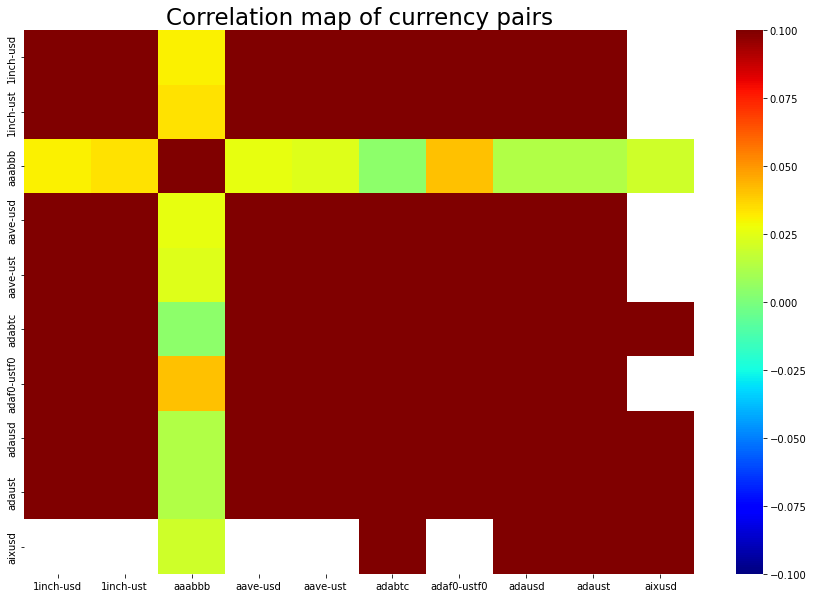

In [9]:
corr_mat = data.corr()

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
sns.heatmap(corr_mat, vmin=-0.1, vmax=0.1, cmap="jet")
ax.set_title('Correlation map of currency pairs', fontsize=23)
plt.show()

As can be seen from the above plot there seem to be some positive correlations. Now the question if these correlations are useful for trading or just an artifact that has no value at all is one of many questions ahead while building your trading algorithm. 
**Have fun!**